In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import radians, cos, sin
import xarray
%matplotlib notebook

<IPython.core.display.Javascript object>


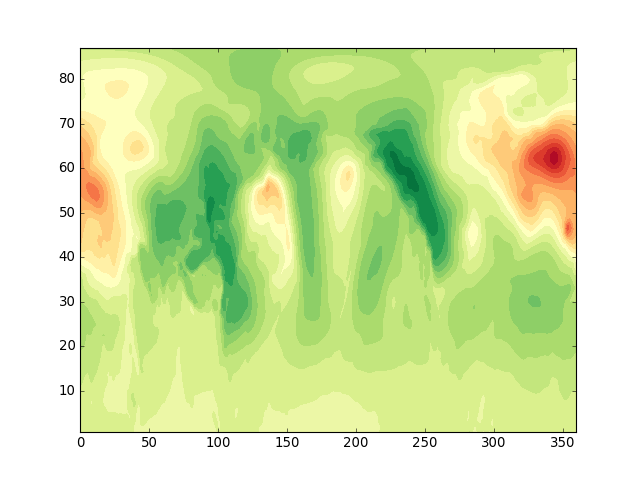

In [2]:
#Read data for Jan 24th 2009
ds = xarray.open_dataset('MSLP-Jan2009.nc').to_array()
#print ds
slp = ds.loc[dict(time='2009-1-24T00',latitude=slice(87,0.5))].squeeze()

plt.figure()
plt.contourf(slp.longitude, slp.latitude, slp, 24, cmap='RdYlGn')

# Change of basis

We change the basis from equi-angular to the one which preserves area, namely the Lambert
Azimuthal basis using the formula shown [here](http://mathworld.wolfram.com/LambertAzimuthalEqual-AreaProjection.html).

In [3]:
latitudes = radians(slp.latitude)
longitudes = radians(slp.longitude)

longitudes, latitudes = np.meshgrid(longitudes,latitudes)

std_latitude = np.radians(90)
std_longitude = np.radians(180)

term1 = sin(std_latitude)*sin(latitudes)
term2 = cos(std_latitude)*cos(latitudes)*cos(longitudes-std_longitude)

kp = np.sqrt(2./(1+term1+term2))

x = kp*cos(latitudes)*sin(longitudes-std_longitude)
y = kp*(cos(std_latitude)*sin(latitudes) - sin(std_latitude)*cos(latitudes)*cos(longitudes-std_longitude))

<IPython.core.display.Javascript object>


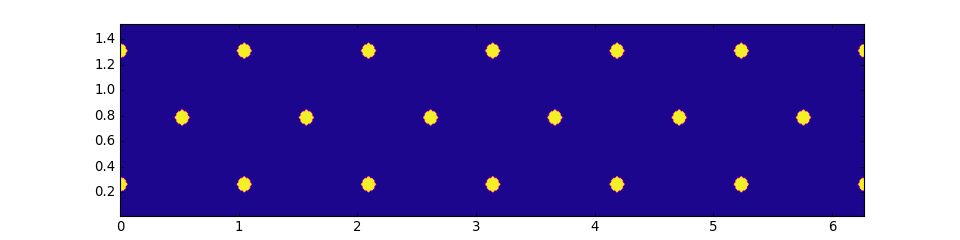

<IPython.core.display.Javascript object>


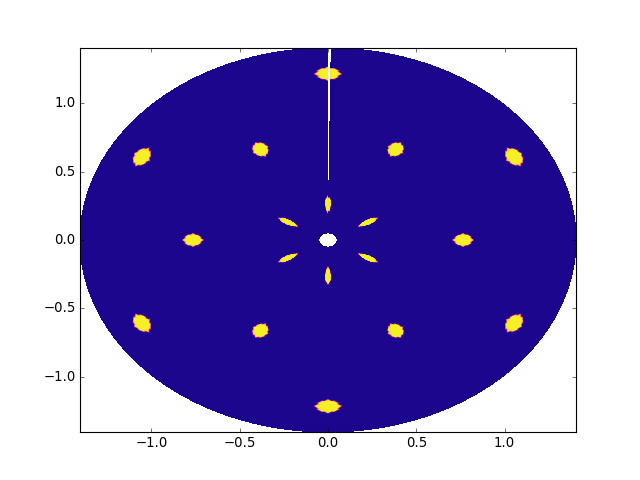

In [4]:
#Draw a circle

circle = (latitudes-radians(70))**2 + (longitudes - radians(0))**2

circle[circle>0.05] = 0

circle = sin(6*latitudes)*cos(6*longitudes)
circle[circle < 0.95] = 0

plt.figure(figsize=(12,3))
plt.contourf(longitudes, latitudes, circle, 24, cmap='plasma')
plt.figure()
plt.contourf(x,y, circle, 24, cmap='plasma')

As you can see, the area of the circle is more representative in the Lambert basis. Now we can plot the
actual data also to get a feel for how it looks.

There is a big difference, especially near the poles. Features which appear large in the regular coordinate system are much smaller.

While this basis does not change the location of the extrema, it will change their calculated intensity (gradient) and size. This will help reject certain extrema.

<IPython.core.display.Javascript object>


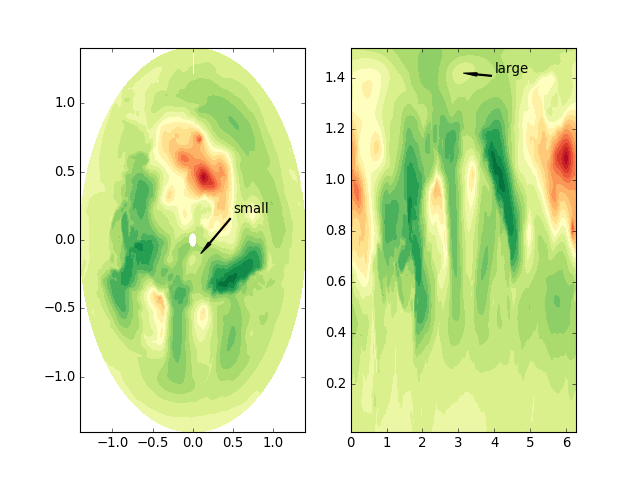

In [5]:
fig, axarr = plt.subplots(1,2)
axarr[0].contourf(x,y,slp,24,cmap='RdYlGn')
axarr[0].annotate('small',xy=(0.1,-0.1),xytext=(0.5,.2),arrowprops=dict(facecolor='black', shrink=0.005,width=1,headwidth=3))

axarr[1].contourf(longitudes,latitudes,slp,24,cmap='RdYlGn')
axarr[1].annotate('large',xy=(3.14,1.42),xytext=(4,1.42),arrowprops=dict(facecolor='black', shrink=0.005,width=1,headwidth=3))